Представьте, что у нас небольшой магазин, туда приходят покупатели, делают покупки и мы можем посчитать их средний чек за день. Также допустим у нас покупатели закупаются раз в 10 дней из-за выгодных предложений. У нас есть исторические данные - user_id, metric, day. metric - cредний чек покупателя, user_id - айдишник покупателя, day - день в прошлом месяце. У нас 10к покупателей, которые были у нас в магазине 2 раза. Мы построили модель, повышающую средний чек у покупателей, и теперь хотим проверить, как она работает. Для этого нам надо правильно спланировать А/Б тест. Данные - 'df_hw.csv'.

Задание:

1) Подобрать дизайн корректного А/Б теста на исторических данных

2) Можно ли статистически значимо задетектить эффект в 2%

3) За какую длительность теста?

4) Как сделать так чтобы хватало 3 дней на тест?

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels
import statsmodels.sandbox.stats.multicomp
import pandas as pd
#import seaborn as sns
from sklearn.utils import shuffle

In [ ]:
df_all = pd.read_csv('df_hw.csv', index_col = 0)

In [ ]:
# https://github.com/irsafilo/HW_AB_tesing/blob/main/data/df_hw.csv

In [ ]:
df_all.head()

,user_id,metric,day
4768,4768,5210.050500,8
1928,1928,1617.534800,8
2995,2995,6742.954000,5
15885,5885,8998.112105,15
6121,6121,2281.206200,1


In [ ]:
metric_train = df_all[df_all['day'] < 10].sort_values(by = ['user_id', 'day'])['metric'].values
metric_valid = df_all[df_all['day'] >= 10].sort_values(by = ['user_id', 'day'])['metric'].values

In [ ]:
inds = [i for i in range(len(metric_train))]

In [ ]:
def plot_hist(x):
    plt.figure(figsize=(7,7))
    plt.hist(x, bins = 100, color='red',  linewidth=2)
    plt.title('Гистограмма средней денежной метрики')
    plt.ylabel('Количество')
    plt.show()

In [ ]:
metric_all = metric_train + metric_valid

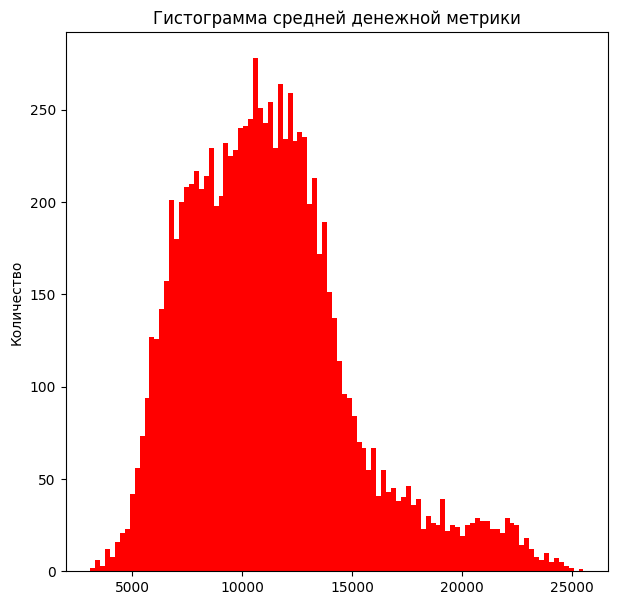

In [ ]:
plot_hist(metric_all)

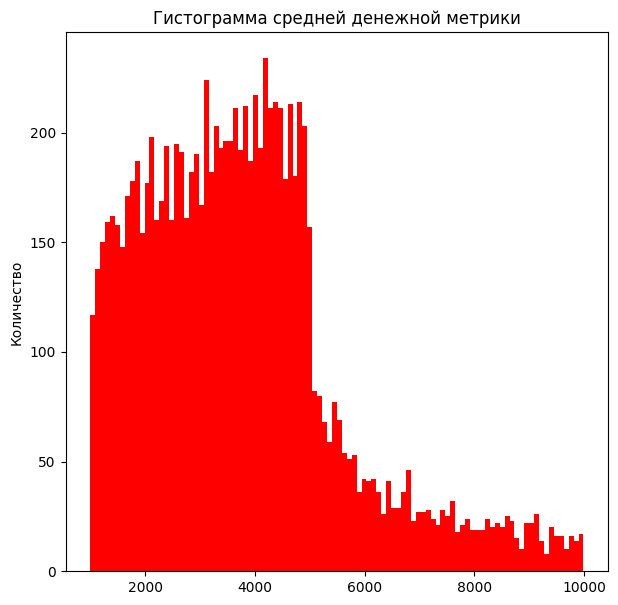

In [ ]:
plot_hist(metric_train)

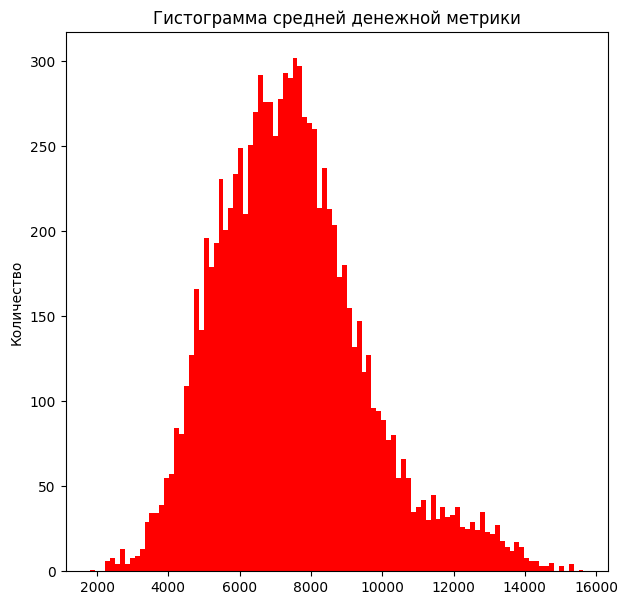

In [ ]:
plot_hist(metric_valid)

In [ ]:
iters = 1000
p_value = []
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    p = scipy.stats.ttest_ind(valid_A, valid_B).pvalue
    p_value.append(p)

0.046

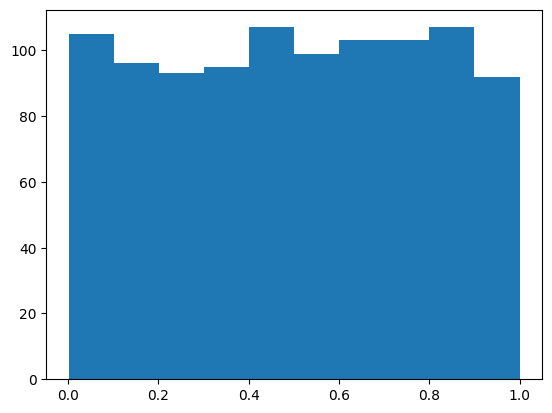

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.017243896727072328, pvalue=0.9223610104190544, statistic_location=0.34824389672707234, statistic_sign=-1)

In [ ]:
np.mean(metric_valid)

7456.122470084466

In [ ]:
np.std(metric_valid)

2088.205946758756

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    valid_A = valid_A * effect
    p = scipy.stats.ttest_ind(valid_A, valid_B ).pvalue
    p_value.append(p)

0.938

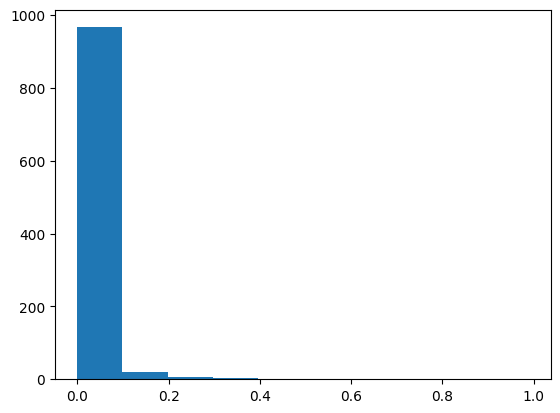

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
metric_train = df_all[df_all['day'].isin([7,8,9])].sort_values(by = ['user_id', 'day'])['metric'].values
metric_valid = df_all[df_all['day'].isin([17,18,19])].sort_values(by = ['user_id', 'day'])['metric'].values

In [ ]:
inds = [i for i in range(len(metric_train))]

In [ ]:
len(inds)

3000

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(inds) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    p = scipy.stats.ttest_ind(valid_A, valid_B ).pvalue
    p_value.append(p)

0.051

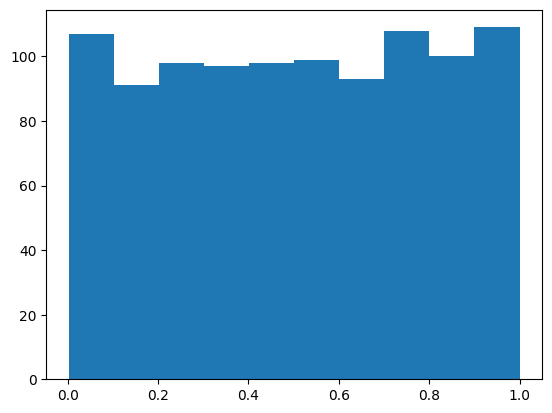

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.021757907946776567, pvalue=0.7224716762134957, statistic_location=0.7507579079467765, statistic_sign=-1)

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(inds) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    valid_A = valid_A * effect
    #p = scipy.stats.mannwhitneyu(valid_A_c, valid_B_c ,alternative='two-sided').pvalue
    p = scipy.stats.ttest_ind(valid_A, valid_B).pvalue
    p_value.append(p)

0.5

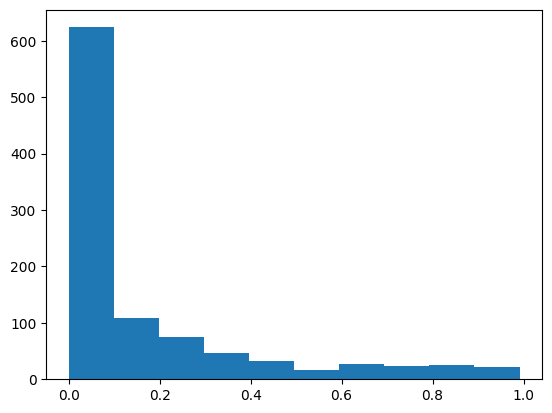

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
scipy.stats.kstest(p_value, scipy.stats.uniform(loc=0.0, scale=1.0).cdf)
len(p_value[p_value < 0.05]) / p_value.shape[0]

In [ ]:
mean_cov = np.mean(metric_train)
var_cov = np.var(metric_train)
covariance = np.cov(metric_valid, metric_train)[0][1]
theta = covariance / var_cov

In [ ]:
train_A[:10]

array([4173.9416, 4661.3739, 2947.6144, 4788.9383, 2377.244 , 2545.7596,
       2222.3991, 3210.168 , 1787.964 , 4065.5742])

In [ ]:
np.std(valid_A[:10])

1561.913444743741

In [ ]:
metric_valid.shape

(3000,)

In [ ]:
iters = 1000
p_value = []
effect = 1.02
for i in range(iters):
    A_l = np.random.choice(inds, size = len(metric_train) // 2, replace = False)
    B_l = np.setdiff1d(inds, A_l)
    train_A = metric_train[A_l]
    train_B = metric_train[B_l]
    valid_A = metric_valid[A_l]
    valid_B = metric_valid[B_l]
    #p_k2s = scipy.stats.ks_2samp(train_A, train_B).pvalue
    valid_A = valid_A * effect
    valid_A_c = valid_A - (train_A - mean_cov) * theta
    valid_B_c = valid_B - (train_B - mean_cov) * theta
    #p = scipy.stats.mannwhitneyu(valid_A_c, valid_B_c ,alternative='two-sided').pvalue
    p = scipy.stats.ttest_ind(valid_A_c, valid_B_c).pvalue
    p_value.append(p)

0.982

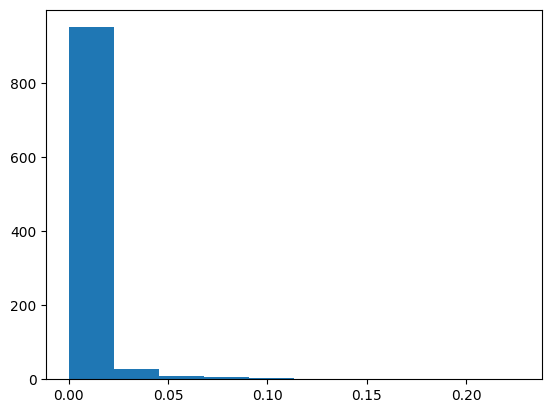

In [ ]:
p_value = np.array(p_value)
plt.hist(p_value)
len(p_value[p_value < 0.05]) / p_value.shape[0]

Y_predict ~ X * theta [+ X1 * theta2 + X2 * theta, CUPAC, build model linear/NN/boostig, SCORING]
Y_real - Y_predict

+ POSTstratification + rank_transformation